![header](../figures/logos_partenaires._cmems_se.jpg)


<div class="alert alert-block alert-success">
<h1><center>Demo: Produce SSH, gradients and Laplacian pdf </center></h1></div>

***
**Authors:**  Datlas, IGE, IMEDEA & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMEDEA & CLS <br>
**License:** MIT

In [1]:
import os
import glob
import sys
sys.path.append('..')
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt
import scipy.signal as sig


from src import mod_plot
from src import mod_switchvar
from src import mod_spectral
from src.dict_regions_info import *

In [2]:

region_info = RegionInfo('GS_info').region_info   # Region dictionary info from dict_regions_info.py

denoising_name = 'Unet_baseline'

len_seg = 250 # in num_lines point (i.e. every 2km)

<div class="alert alert-info" role="alert">

<h2>A - 1 day orbit </h2>

</div>
 

In [3]:
path_data = '../swot_data/swot_1j_share_'+region_info['name']+'.nc'

orbit = '1d'

ds_SWOT = xr.open_mfdataset(path_data)
  

## Compute psd for SSH

In [4]:
%%time  

name_var = 'ssha_new_editing'
ssh_new_editing_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

name_var = 'ssha_denoised_unet'
ssh_denoised_unet_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

wavenum, psd_new_editing = sig.welch(np.ravel(ssh_new_editing_segs),0.5,nperseg=len_seg,noverlap=0) 
wavenum, psd_denoised_unet = sig.welch(np.ravel(ssh_denoised_unet_segs),0.5,nperseg=len_seg,noverlap=0)

wavenum, psd_new_editing, psd_denoised_unet = wavenum[:-1], psd_new_editing[:-1], psd_denoised_unet[:-1] 


Number of segs 1461 of size 250
Number of segs 1457 of size 250
CPU times: user 11.9 s, sys: 205 ms, total: 12.1 s
Wall time: 12.5 s


## Plot psd for SSH

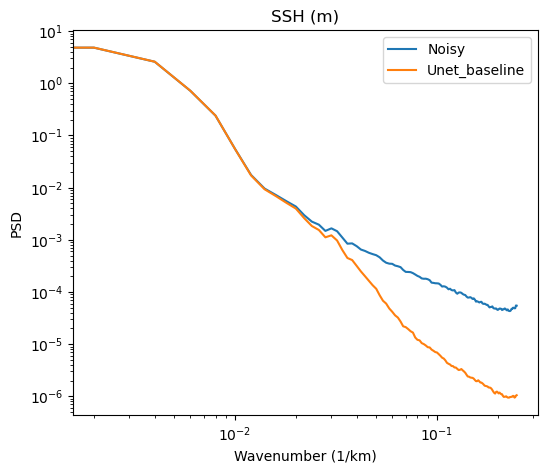

In [5]:
plt.figure(figsize=(6,5))
plt.title('SSH (m)')
plt.loglog(wavenum,psd_new_editing,label='Noisy')
plt.loglog(wavenum,psd_denoised_unet,label=denoising_name)
plt.xlabel('Wavenumber (1/km)')
plt.ylabel('PSD')
plt.legend()
plt.savefig('../figures/psd_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_ssh.png')

plt.show()



## Compute SSH gradients and Laplacian

In [6]:
grad_new_editing, lapl_new_editing = mod_switchvar.deriv1and2(ds_SWOT.ssha_new_editing)
grad_denoised_unet, lapl_denoised_unet = mod_switchvar.deriv1and2(ds_SWOT.ssha_denoised_unet)


ds_SWOT = ds_SWOT.assign(grad_new_editing=lambda ds_SWOT: ds_SWOT.ssha_new_editing * 0 + grad_new_editing)
ds_SWOT = ds_SWOT.assign(grad_denoised_unet=lambda ds_SWOT: ds_SWOT.ssha_denoised_unet * 0 + grad_denoised_unet)

ds_SWOT = ds_SWOT.assign(lapl_new_editing=lambda ds_SWOT: ds_SWOT.ssha_new_editing * 0 + lapl_new_editing)
ds_SWOT = ds_SWOT.assign(lapl_denoised_unet=lambda ds_SWOT: ds_SWOT.ssha_denoised_unet * 0 + lapl_denoised_unet)


## Compute psd for gradients

In [7]:
%%time  

name_var = 'grad_new_editing'
ssh_new_editing_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

name_var = 'grad_denoised_unet'
ssh_denoised_unet_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

wavenum, psd_new_editing = sig.welch(np.ravel(ssh_new_editing_segs),0.5,nperseg=len_seg,noverlap=0) 
wavenum, psd_denoised_unet = sig.welch(np.ravel(ssh_denoised_unet_segs),0.5,nperseg=len_seg,noverlap=0)

wavenum, psd_new_editing, psd_denoised_unet = wavenum[:-1], psd_new_editing[:-1], psd_denoised_unet[:-1] 


Number of segs 1461 of size 250
Number of segs 1457 of size 250
CPU times: user 12.1 s, sys: 172 ms, total: 12.3 s
Wall time: 12.6 s


## Plot psd for gradients

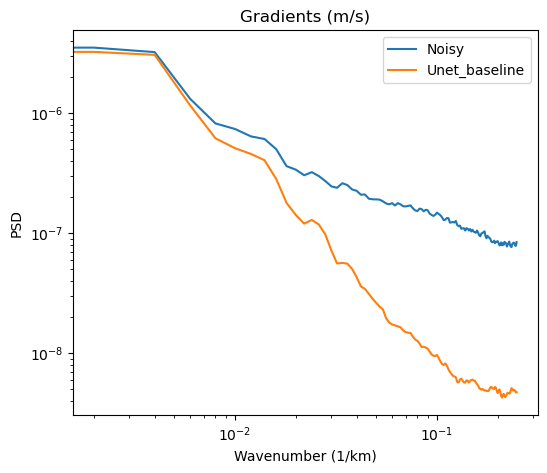

In [8]:
plt.figure(figsize=(6,5))
plt.title('Gradients (m/s)')
plt.loglog(wavenum,psd_new_editing,label='Noisy')
plt.loglog(wavenum,psd_denoised_unet,label=denoising_name)
plt.xlabel('Wavenumber (1/km)')
plt.ylabel('PSD')
plt.legend()
plt.savefig('../figures/psd_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_grad.png')

plt.show()



## Compute psd for Laplacians

In [9]:
%%time  

name_var = 'lapl_new_editing'
ssh_new_editing_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

name_var = 'lapl_denoised_unet'
ssh_denoised_unet_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

wavenum, psd_new_editing = sig.welch(np.ravel(ssh_new_editing_segs),0.5,nperseg=len_seg,noverlap=0) 
wavenum, psd_denoised_unet = sig.welch(np.ravel(ssh_denoised_unet_segs),0.5,nperseg=len_seg,noverlap=0)



wavenum, psd_new_editing, psd_denoised_unet = wavenum[:-1], psd_new_editing[:-1], psd_denoised_unet[:-1] 

Number of segs 1154 of size 250
Number of segs 1150 of size 250
CPU times: user 10.8 s, sys: 138 ms, total: 10.9 s
Wall time: 11.2 s


## Plot psd for Laplacians

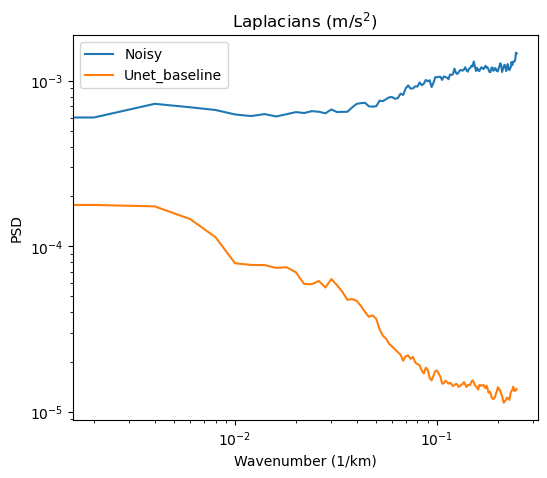

In [10]:
plt.figure(figsize=(6,5))
plt.title('Laplacians (m/s$^2$)')
plt.loglog(wavenum,psd_new_editing,label='Noisy')
plt.loglog(wavenum,psd_denoised_unet,label=denoising_name)
plt.xlabel('Wavenumber (1/km)')
plt.ylabel('PSD')
plt.legend()
plt.savefig('../figures/psd_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_lapl.png')

plt.show()



<div class="alert alert-info" role="alert">

<h2>B - 21 day orbit </h2>

</div>
 

In [11]:
path_data = '../swot_data/swot_21j_share_'+region_info['name']+'.nc'

orbit = '21d'

ds_SWOT = xr.open_mfdataset(path_data)
  

## Compute psd for SSH

In [12]:
%%time  

name_var = 'ssha_new_editing'
ssh_new_editing_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

name_var = 'ssha_denoised_unet'
ssh_denoised_unet_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

wavenum, psd_new_editing = sig.welch(np.ravel(ssh_new_editing_segs),0.5,nperseg=len_seg,noverlap=0) 
wavenum, psd_denoised_unet = sig.welch(np.ravel(ssh_denoised_unet_segs),0.5,nperseg=len_seg,noverlap=0)


wavenum, psd_new_editing, psd_denoised_unet = wavenum[:-1], psd_new_editing[:-1], psd_denoised_unet[:-1] 

Number of segs 525 of size 250
Number of segs 519 of size 250
CPU times: user 4.73 s, sys: 62.8 ms, total: 4.79 s
Wall time: 4.89 s


## Plot psd for SSH

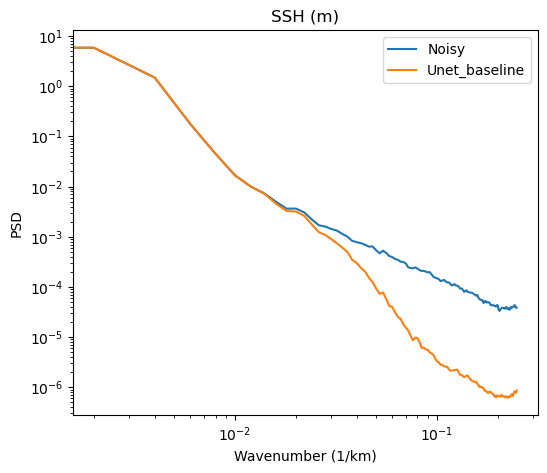

In [13]:
plt.figure(figsize=(6,5))
plt.title('SSH (m)')
plt.loglog(wavenum,psd_new_editing,label='Noisy')
plt.loglog(wavenum,psd_denoised_unet,label=denoising_name)
plt.xlabel('Wavenumber (1/km)')
plt.ylabel('PSD')
plt.legend()
plt.savefig('../figures/psd_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_ssh.png')

plt.show()



## Compute SSH gradients and Laplacian

In [14]:
grad_new_editing, lapl_new_editing = mod_switchvar.deriv1and2(ds_SWOT.ssha_new_editing)
grad_denoised_unet, lapl_denoised_unet = mod_switchvar.deriv1and2(ds_SWOT.ssha_denoised_unet)


ds_SWOT = ds_SWOT.assign(grad_new_editing=lambda ds_SWOT: ds_SWOT.ssha_new_editing * 0 + grad_new_editing)
ds_SWOT = ds_SWOT.assign(grad_denoised_unet=lambda ds_SWOT: ds_SWOT.ssha_denoised_unet * 0 + grad_denoised_unet)

ds_SWOT = ds_SWOT.assign(lapl_new_editing=lambda ds_SWOT: ds_SWOT.ssha_new_editing * 0 + lapl_new_editing)
ds_SWOT = ds_SWOT.assign(lapl_denoised_unet=lambda ds_SWOT: ds_SWOT.ssha_denoised_unet * 0 + lapl_denoised_unet)


## Compute psd for gradients

In [15]:
%%time  

name_var = 'grad_new_editing'
ssh_new_editing_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

name_var = 'grad_denoised_unet'
ssh_denoised_unet_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

wavenum, psd_new_editing = sig.welch(np.ravel(ssh_new_editing_segs),0.5,nperseg=len_seg,noverlap=0) 
wavenum, psd_denoised_unet = sig.welch(np.ravel(ssh_denoised_unet_segs),0.5,nperseg=len_seg,noverlap=0)


wavenum, psd_new_editing, psd_denoised_unet = wavenum[:-1], psd_new_editing[:-1], psd_denoised_unet[:-1] 

Number of segs 525 of size 250
Number of segs 519 of size 250
CPU times: user 4.56 s, sys: 57.2 ms, total: 4.62 s
Wall time: 4.7 s


## Plot psd for gradients

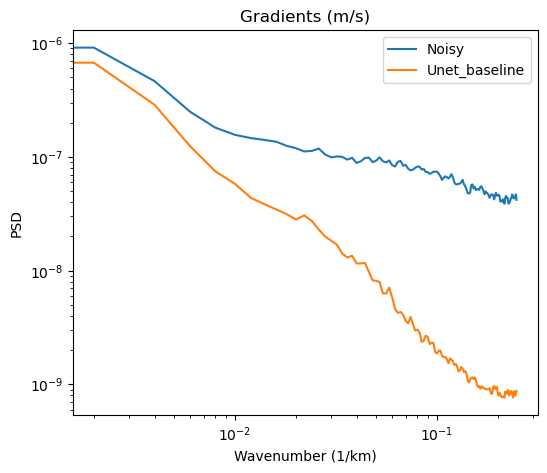

In [16]:
plt.figure(figsize=(6,5))
plt.title('Gradients (m/s)')
plt.loglog(wavenum,psd_new_editing,label='Noisy')
plt.loglog(wavenum,psd_denoised_unet,label=denoising_name)
plt.xlabel('Wavenumber (1/km)')
plt.ylabel('PSD')
plt.legend()
plt.savefig('../figures/psd_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_grad.png')

plt.show()



## Compute psd for Laplacians

In [17]:
%%time  

name_var = 'lapl_new_editing'
ssh_new_editing_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

name_var = 'lapl_denoised_unet'
ssh_denoised_unet_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

wavenum, psd_new_editing = sig.welch(np.ravel(ssh_new_editing_segs),0.5,nperseg=len_seg,noverlap=0) 
wavenum, psd_denoised_unet = sig.welch(np.ravel(ssh_denoised_unet_segs),0.5,nperseg=len_seg,noverlap=0)


wavenum, psd_new_editing, psd_denoised_unet = wavenum[:-1], psd_new_editing[:-1], psd_denoised_unet[:-1] 

Number of segs 394 of size 250
Number of segs 388 of size 250
CPU times: user 4.22 s, sys: 55.5 ms, total: 4.27 s
Wall time: 4.37 s


## Plot psd for Laplacians

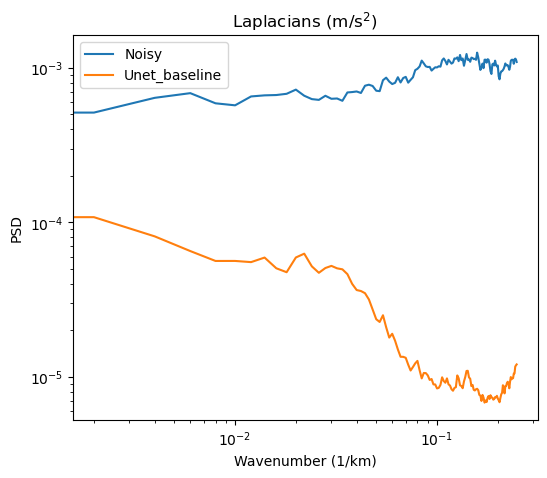

In [18]:
plt.figure(figsize=(6,5))
plt.title('Laplacians (m/s$^2$)')
plt.loglog(wavenum,psd_new_editing,label='Noisy')
plt.loglog(wavenum,psd_denoised_unet,label=denoising_name)
plt.xlabel('Wavenumber (1/km)')
plt.ylabel('PSD')
plt.legend()
plt.savefig('../figures/psd_'+denoising_name+'_'+region_info['name']+'_'+orbit+'_lapl.png')

plt.show()

